前五题中我选择了二、三、四、五作答；后五题中我选择了九、十作答。

# 二、分类和聚类的区别与联系；少样本提高分类算法可靠性

分类与聚类算法的区别在于：分类是有监督算法，是根据带类别标签的训练集，建立模型，从而预测某些样本的真实标签；而聚类是无监督算法，完全根据样本间的某些特征（比如相似度、样本间的距离），给整体聚成几种类别。在应用中，分类一般用于衡量样本某些指标对于某种类别的决定作用和映射关系；聚类一般用于划分样本的类型。

在做分类问题时，如果训练数据量比较少，为了提高分类算法的可靠性。一般要采取k折交叉验证的方式，通过k次在验证集上选择最优的分类模型和最优的模型参数，从而提高模型的泛化能力。如果数据量过少，可以选择留一折交叉验证的方法。（参考自李航的《统计学习方法》）

# 三、费雪信息矩阵

定义：设$p(x;\theta)$是总体X的概率函数，其中$\theta = (\theta_1, \theta_2, ..., \theta_m)$是m维未知参数，则费雪信息矩阵$I(\theta) = [I_{ij}(\theta)]_{m\times m}$,其中$I_{ij}(\theta) = -E[\frac{\partial^2 lnp(X;\theta)}{\partial\theta_i \theta_j}]$

应用一、用以衡量随机变量一个样本所能提供的关于状态参数在某种意义下的平均信息量（最直观的涵义）

应用二、克拉默-拉奥方差下界在多维情形下的推广：设$\Sigma_{\theta} = D\hat{\theta}$是$\hat{\theta}$的方差矩阵，则$\Sigma_{\theta} - \frac{I^{-1}(\theta)}{n}$是非负定矩阵

应用三、在深度学习或强化学习领域，费雪信息矩阵有时作为约束条件在算法中出现，和KL散度具有一定的联系。比如自然梯度法（参考自一自然梯度法课程教学网站：https://agustinus.kristia.de/techblog/2018/03/14/natural-gradient/）：

1.重复： \
a.模型正向传播，计算损失$L(\theta)$ \
b.计算梯度$\nabla_{\theta} L(\theta)$ \
c.计算费雪信息矩阵$F$ \
d.计算自然梯度$\nabla'_{\theta}L(\theta) = F^{-1}\nabla_{\theta} L(\theta)$ \
e.更新参数$\theta = \theta - \alpha \nabla'_{\theta}L(\theta) $ \
2.直到收敛

# 四、统计检测

在做统计检测时，会做出一个原假设$H_0$，假设原假设成立的基础上，根据观测做出接受或者拒绝原假设的判断。

第一类错误，也称拒真错误。是指$H_0$实际上成立时，将$H_0$拒绝的错误。\
第二类错误，也称取伪错误。是指$H_0$实际上不成立时，将$H_0$接受（没能拒绝）的错误。

NP引理阐述了在简单原假设对简单备择假设中，MPT一定存在并且可以具体构造出MPT的检验函数，如下是具体定义和证明（参考自茆诗松《高等数理统计》）。

定义： \
设$P_{\theta_0}$和$P_{\theta_1}$是可测空间$(H, B)$上的两个不同概率测度，关于某个$\sigma$有限的测度$\mu$，有 \
$p(x;\theta_0) = \frac{dP_{\theta_0}}{d\mu}$, $p(x;\theta_1) = \frac{dP_{\theta_1}}{d\mu}$ \
则在上述检验问题中， \
(1)对给定的$\alpha(0 < \alpha < 1)$存在一个检验函数$\phi(x)$和常数$k \ge 0$,使得 \
$E_{\theta_0}[\phi(x)] = \alpha\cdots (a)$, \
$\phi(x) = \begin{cases} 1, p(x;\theta_1) > k \cdot p(x;\theta_0) \\ 0, p(x;\theta_1) < k \cdot p(x;\theta_0) \end{cases} \cdots (b)$ \
(2)由上两式确定的检验函数$\phi(x)$是水平为$\alpha$的MPT，则一定存在常数$k > 0$，使得$\phi(x)$满足b式 

证明：

1.首先证明（1），存在形如（b）的检验函数，且使得（a）成立。 \
对于任一实数$\lambda$，令 \
$G(\lambda) = P_{\theta_0}\{p(x;\theta_1) > \lambda \cdot p(x;\theta_0)\}$, \
由于此概率是在$P_{\theta_0}$下计算，因此，只要在集合$\{ x: p(x;\theta_0) > 0\}$中考虑不等式$p(x;\theta_1) > \lambda \cdot p(x;\theta_0)$ \
$G(\lambda)$是非负随机变量$\frac{p(x;\theta_1)}{p(x;\theta_0)} > \lambda$的概率，因此$1 - G(\lambda)$是随机变量$\frac{p(x;\theta_1)}{p(x;\theta_0)} $的分布函数。所以$G(\lambda)$非增右连续\
给定$\alpha \in (0, 1)$,只存在下述两种情况： \
$\alpha$.存在$\lambda > 0$,使得$G(\lambda_0) = \alpha$ 定义 \
$\phi(x) = \begin{cases} 1, p(x;\theta_1) > \lambda_0 \cdot p(x;\theta_0) \\ 0, p(x;\theta_1) < \lambda_0 \cdot p(x;\theta_0) \end{cases} $ \
则 $E_{\theta_0}[\phi(X)] = P_{\theta_0}\{p(x;\theta_1) > \lambda_0 \cdot p(x;\theta_0)\} = G(\lambda_0) = \alpha$ \
$\beta$.存在$\lambda_0 \ge 0$，使得$G(\lambda_0) < \alpha \le G(\lambda_0 - 0)$,定义 \
$\phi(x) = \begin{cases} 1\quad , p(x;\theta_1) > \lambda_0 \cdot p(x;\theta_0)  \\ \frac{\alpha - G(\lambda_0)}{G(\lambda_0 - 0) - G(\lambda_0)} \quad , p(x;\theta_1) = \lambda_0 \cdot p(x;\theta_0) \\ 0 \quad , p(x;\theta_1) < \lambda_0 \cdot p(x;\theta_0) \end{cases}$ \
则$E_{\theta_0}[\phi(X)] = P_{\theta_0}\{p(x;\theta_1) > \lambda_0 \cdot p(x;\theta_0)\} + \frac{\alpha - G(\lambda_0)}{G(\lambda_0 - 0) - G(\lambda_0)} \cdot P_{\theta_0}\{p(x;\theta_1) = \lambda_0 \cdot p(x;\theta_0)\} =G(\lambda_0) + [\alpha - G(\lambda_0)] = \alpha$ \
在上述$\alpha$ 和 $\beta$两种情况， $\lambda_0$可以被取为（b）式中的非负常数k。$\phi(x)$使得a式成立，这说明$\phi(x)$是水平为$\alpha$的检验函数。 \

2.其次证明，由a，b二式得到的检验函数$\phi(x)$是MPT。 \
设$\phi'(x)$是其他任意一个水平为$\alpha$的检验函数，即$E_{\theta_0}[\phi'(x)] \le \alpha $。由于$\phi(x)$满足b式，所以 \
$[\phi(x) - \phi'(x)] \cdot [p(x ; \theta_1) - k \cdot p(x ; \theta_0)] \ge 0$ \
故 \
$\int [\phi(x) - \phi'(x)] \cdot [p(x ; \theta_1) - k \cdot p(x ; \theta_0)] d\mu(x) \ge 0$
因此， \
$E_{\theta_1}[\phi(X)] - E_{\theta_1}[\phi'(X)] \ge k \cdot (E_{\theta_0}[\phi(X)] - E_{\theta_0}[\phi'(X)]) = k \cdot [\alpha -  E_{\theta_0}[\phi'(X)]] \ge 0$ \
因此证明了$\phi(x)$是MPT

3.最后证明：若$\phi'(x)$是水平为$\alpha$的MPT，则一定存在非负常数k，使得$\phi'(x)$满足b式。 \
设$\phi(x)$是满足a和b的检验函数。由上述可知$\phi(x)$是水平为$\alpha$的MPT，则$E_{\theta_1}[\phi'(x)] = E_{\theta_1}[\phi(x)]$。又由于$\phi(x)$满足b式，所以 \
$[\phi(x) - \phi'(x)] \cdot [p(x ; \theta_1) - k \cdot p(x ; \theta_0)] \ge 0$ \
因为$E_{\theta_1}[\phi'(x)] = E_{\theta_1}[\phi(x)] $,$E_{\theta_0}[\phi'(x)] \le \alpha = E_{\theta_0}[\phi(x)]$,故 \
$\int [\phi(x) - \phi'(x)] \cdot [p(x ; \theta_1) - k \cdot p(x ; \theta_0)] d\mu(x)$  \
$ = E_{\theta_1}[\phi(x)] - E_{\theta_1}[\phi'(x)] - k \cdot (E_{\theta_0}[\phi(x)] - E_{\theta_0}[\phi'(x)]) \le 0$ \
比较以上两个不等式，有： \
$[\phi(x) - \phi'(x)] \cdot [p(x;\theta_1) - k \cdot p(x;\theta_0)] = 0$ \
因此在集合$\{ x: p(x;\theta_1) - k \cdot p(x;\theta_0) \ne 0\}$中，有$\phi(x) = \phi'(x)$,证明了$\phi'(x)$满足b式，证毕。

# 五、顾客购买可能估计问题

首先读入数据

In [1]:
import pandas as pd
df = pd.read_excel('customer.xlsx')
df

,User id,Age,Incoming,Student,Credit Rating,Buying
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,"[31,40]",high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,fair,yes
5,6,>40,low,yes,excellent,no
6,7,"[31,40]",low,yes,excellent,yes
7,8,<=30,medium,no,fair,no
8,9,<=30,low,yes,fair,yes
9,10,>40,medium,yes,fair,yes


对数据进行初步格式清洗

In [2]:
x = df[list(df.columns)[1:5]]
y = df['Buying'].apply(lambda x: 1 if (x == 'yes') else 0)
x['Age'] = x['Age'].apply(lambda x: x.strip())

C:\Users\86153\AppData\Local\Temp\ipykernel_15120\1395712373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'] = x['Age'].apply(lambda x: x.strip())


In [3]:
x, y

(        Age Incoming Student Credit Rating
 0      <=30     high      no          fair
 1      <=30     high      no     excellent
 2   [31,40]     high      no          fair
 3       >40   medium      no          fair
 4       >40      low     yes          fair
 5       >40      low     yes     excellent
 6   [31,40]      low     yes     excellent
 7      <=30   medium      no          fair
 8      <=30      low     yes          fair
 9       >40   medium     yes          fair
 10     <=30   medium     yes     excellent
 11  [31,40]   medium      no     excellent
 12  [31,40]     high     yes          fair,
 0     0
 1     0
 2     1
 3     1
 4     1
 5     0
 6     1
 7     0
 8     1
 9     1
 10    1
 11    1
 12    1
 Name: Buying, dtype: int64)

由于这里所有类别都是程度变量，为了可以正常使用模型，根据程度的大小将类别变量转换为整型变量

In [4]:
def age(x):
    if x == '<=30':
        return 0
    if x == '[31,40]':
        return 1
    return 2
def incoming(x):
    if x == 'low':
        return 0
    if x == 'medium':
        return 1
    return 2
def student(x):
    if x == 'no':
        return 0
    return 1
def credit(x):
    if x == 'excellent':
        return 1
    return 0

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

x['Age'] = x['Age'].apply(lambda x : age(x))
x['Incoming'] = x['Incoming'].apply(lambda x : incoming(x))
x['Student'] = x['Student'].apply(lambda x : student(x))
x['Credit Rating'] = x['Credit Rating'].apply(lambda x : credit(x))
x

,Age,Incoming,Student,Credit Rating
0,0,2,0,0
1,0,2,0,1
2,1,2,0,0
3,2,1,0,0
4,2,0,1,0
5,2,0,1,1
6,1,0,1,1
7,0,1,0,0
8,0,0,1,0
9,2,1,1,0


建立决策树，查看顾客购买的可能（下矩阵第二列）

In [6]:
clt = DecisionTreeClassifier(min_samples_leaf = 2)
clt = clt.fit(x, y)
clt.predict_proba(x)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ]])

查看拟合与真值对比，只有第六名顾客被误分类了：

In [7]:
clt.predict(x)

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
import numpy as np
np.array(y)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

画出决策树：

In [9]:
import graphviz

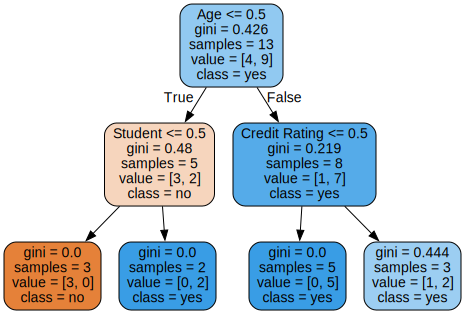

In [10]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clt, out_file = None, feature_names = list(x.columns), class_names = ['no', 'yes'],filled = True, rounded = True)
graphviz.Source(dot_data)

可以看到决策树的划分思路是，年龄小于30岁并且不是学生的顾客有较低的购买可能，剩余顾客有较高的购买可能。

# 九、识别垃圾邮件

使用词袋模型，将每一个邮件处理成为一个向量样本。随机以3：2划分训练集和测试集。使用朴素贝叶斯模型。训练出在测试集上准确率为0.94，困惑矩阵为$[[5950,625],[150,6761]]$的垃圾邮件识别模型

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import os
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm


max_features=5000


# 将整个邮件当成一个字符串处理，其中回车和换行需要过滤掉
def load_one_file(filename):
    x = ""
    with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            line = line.strip('\n')
            line = line.strip('\r')
            x += line
    return x


# 遍历指定文件夹下所有文件，加载数据
def load_files_from_dir(rootdir):
    x = []
    list1 = os.listdir(rootdir)
    for i in range(0, len(list1)):
        path = os.path.join(rootdir, list1[i])
        if os.path.isfile(path):
            v = load_one_file(path)
            x.append(v)
    return x


# 加载所在的文件夹，正常邮件在ham中，垃圾邮件在spam中。
def load_all_files():
    ham = []
    spam = []
    for i in tqdm(range(1, 7)):
        path = "enron_spam_data/enron%d/ham/" % i
        ham += load_files_from_dir(path)
        path = "enron_spam_data/enron%d/spam/" % i
        spam += load_files_from_dir(path)
    return ham, spam


# 使用词袋模型，向量化邮件样本，ham标记为0，spam标记为1
def get_features_by_wordbag():
    ham, spam = load_all_files()
    x = ham + spam
    y = [0] * len(ham) + [1] * len(spam)
    vectorizer = CountVectorizer(
        decode_error='ignore',
        strip_accents='ascii',
        max_features=max_features,
        stop_words='english',
        max_df=1.0,
        min_df=1)
    print(vectorizer)
    x = vectorizer.fit_transform(x)
    x = x.toarray()
    return x, y


# 构建贝叶斯模型
def do_nb_wordbag(x_train, x_test, y_train, y_test):
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))


if __name__ == "__main__":
    x, y = get_features_by_wordbag()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)  # 测试集比例为40%
    do_nb_wordbag(x_train, x_test, y_train, y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.45it/s]


CountVectorizer(decode_error='ignore', max_features=5000, stop_words='english',
                strip_accents='ascii')
0.9425329971822631
[[5950  625]
 [ 150 6761]]


# 十、深证B股指数

深证b指399108

In [12]:
import efinance as ef # 一个内置爬虫的股票数据python库
from tqdm import tqdm
import pandas as pd

首先查看一下从http://www.szse.cn/market/exponent/sample/ 下载的深证b指样本股信息

In [13]:
df_sample = pd.read_excel('指数样本股.xlsx')
df_sample

,证券代码,证券简称,总股本,流通股本,行业,计算标志
0,200011,深物业B,"67,605,243","67,605,243",K70 房地产业,1
1,200012,南 玻Ｂ,"1,109,369,060","1,109,369,060",C30 非金属矿物制品业,1
2,200016,深康佳Ｂ,"811,351,608","811,351,608",C39 计算机、通信和其他电子设备,1
3,200017,深中华B,"248,362,982","248,362,982",C37 铁路、船舶、航空航天和其他,1
4,200019,深粮B,"51,749,280","51,749,280",F51 批发业,1
5,200020,深华发Ｂ,"101,995,836","101,995,836",C39 计算机、通信和其他电子设备,1
6,200025,特 力Ｂ,"38,280,000","38,280,000",F51 批发业,1
7,200026,飞亚达Ｂ,"49,936,697","49,936,697",F52 零售业,1
8,200028,一致Ｂ,"54,885,600","54,884,475",F51 批发业,1
9,200029,深深房Ｂ,"120,000,000","120,000,000",K70 房地产业,1


查看从2012.01.01-2022.01.01这十年间深证b指的情况如下：

In [14]:
ef.stock.get_quote_history('399108', beg = '20120101', end = '20220101')

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,深证Ｂ指,399108,2012-01-04,569.37,559.29,572.19,558.22,257855,140200056.0,2.46,-1.37,-7.75,0.21
1,深证Ｂ指,399108,2012-01-05,559.03,551.65,559.25,550.13,239132,104786387.0,1.63,-1.37,-7.64,0.20
2,深证Ｂ指,399108,2012-01-06,551.00,555.68,555.88,547.36,238902,107709568.0,1.54,0.73,4.03,0.20
3,深证Ｂ指,399108,2012-01-09,554.72,570.28,570.28,554.50,399711,185938124.0,2.84,2.63,14.60,0.33
4,深证Ｂ指,399108,2012-01-10,569.44,583.23,584.15,569.14,618847,271581568.0,2.63,2.27,12.95,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,深证Ｂ指,399108,2021-12-27,1169.56,1171.00,1180.11,1167.72,110780,51735156.0,1.06,0.14,1.68,0.09
2427,深证Ｂ指,399108,2021-12-28,1171.71,1174.77,1174.77,1170.08,94302,35003831.0,0.40,0.32,3.77,0.08
2428,深证Ｂ指,399108,2021-12-29,1174.73,1166.87,1176.04,1164.37,86942,32360625.0,0.99,-0.67,-7.90,0.07
2429,深证Ｂ指,399108,2021-12-30,1166.39,1168.78,1171.30,1162.60,140027,47251752.0,0.75,0.16,1.91,0.11


获取样本股的代码

In [15]:
stock_codes = list(df_sample['证券代码'])

In [16]:
def get_quote_data(stock_codes, beg = '20210101', end = '20220101',threshold = 0,save = False): # 获取指定股票代码在指定时间范围的日级交易数据框
    stock_codes = ['399108'] + stock_codes
    dic = ef.stock.get_quote_history(stock_codes, beg=beg, end=end)
    df = dic['399108'][['日期', '收盘']]
    column_name = ['日期', '深证b指']
    df.columns = column_name
    for code in tqdm(stock_codes[1:]):
        if len(dic[code]) > threshold:  # 只选择有效交易天数大于阈值的股票
            df = df.merge(dic[code], on='日期', how='left')[column_name + ['收盘']]
            column_name = column_name + [code]
            df.columns = column_name
    if save: # 可以设置save参数为保存文件名，默认为不保存
        df.to_excel(f'{save}.xlsx', index=False)
    return df

获取深证b指和相应样本股在2012.01.01-2022.01.01这十年间的收盘价

In [17]:
df = get_quote_data(stock_codes,beg = '20120101', end = '20220101')
df

100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 122.54it/s]


,日期,深证b指,200011,200012,200016,200017,200019,200020,200025,200026,...,200596,200625,200706,200725,200726,200761,200771,200869,200992,201872
0,2012-01-04,559.29,0.23,1.66,0.29,1.10,1.29,2.24,2.29,NaN,...,14.94,-0.34,4.57,0.46,1.54,0.71,3.34,57.53,2.85,2.32
1,2012-01-05,551.65,0.08,1.57,0.28,1.12,1.27,2.19,2.27,6.74,...,15.13,-0.37,4.54,0.46,1.55,0.69,3.24,56.92,2.81,2.39
2,2012-01-06,555.68,0.17,1.62,0.28,1.11,1.24,2.22,2.28,6.14,...,15.18,-0.37,4.57,0.47,1.66,0.70,3.32,56.76,2.83,2.38
3,2012-01-09,570.28,0.32,1.81,0.30,1.14,1.31,2.27,2.35,6.15,...,15.62,-0.35,4.77,0.50,1.79,0.77,3.57,57.15,2.95,2.53
4,2012-01-10,583.23,0.40,2.07,0.32,1.16,1.37,2.35,2.44,6.36,...,16.00,-0.31,4.81,0.54,1.91,0.81,3.73,57.93,3.10,2.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,2021-12-27,1171.00,5.34,2.97,2.28,1.41,3.30,2.96,4.12,6.98,...,110.59,3.11,3.51,3.19,3.72,1.91,12.04,13.43,3.04,8.08
2427,2021-12-28,1174.77,5.33,2.98,2.29,1.43,3.29,2.93,4.10,7.05,...,111.02,3.20,3.48,3.19,3.71,1.92,12.07,13.44,3.05,8.05
2428,2021-12-29,1166.87,5.34,3.03,2.29,1.41,3.28,2.95,4.09,7.01,...,107.45,3.17,3.46,3.19,3.69,1.94,12.09,13.30,3.02,8.04
2429,2021-12-30,1168.78,5.32,3.04,2.30,1.43,3.31,2.96,4.08,7.05,...,107.42,3.16,3.56,3.23,3.67,1.94,12.08,13.39,3.01,7.89


去除空值行

In [18]:
df_train = df.dropna()
df_train

,日期,深证b指,200011,200012,200016,200017,200019,200020,200025,200026,...,200596,200625,200706,200725,200726,200761,200771,200869,200992,201872
2149,2020-11-09,960.52,4.33,2.23,2.09,0.94,3.34,3.39,4.61,5.73,...,89.51,2.43,2.79,2.65,3.61,0.10,6.27,12.68,2.99,5.86
2150,2020-11-10,956.64,4.37,2.22,2.07,0.93,3.34,3.38,4.65,5.40,...,89.70,2.36,2.79,2.63,3.72,0.10,6.28,12.99,2.99,5.79
2151,2020-11-11,955.94,4.31,2.22,2.07,0.94,3.32,3.37,4.65,5.63,...,89.70,2.33,2.79,2.59,3.76,0.11,6.31,13.29,2.97,5.80
2152,2020-11-12,956.67,4.27,2.21,2.13,0.92,3.32,3.36,4.65,5.64,...,89.98,2.35,2.78,2.62,3.74,0.11,6.32,13.54,2.99,5.73
2153,2020-11-13,952.94,4.18,2.20,2.10,0.93,3.27,3.36,4.52,5.62,...,88.79,2.41,2.76,2.61,3.74,0.10,6.38,13.04,2.98,5.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,2021-12-27,1171.00,5.34,2.97,2.28,1.41,3.30,2.96,4.12,6.98,...,110.59,3.11,3.51,3.19,3.72,1.91,12.04,13.43,3.04,8.08
2427,2021-12-28,1174.77,5.33,2.98,2.29,1.43,3.29,2.93,4.10,7.05,...,111.02,3.20,3.48,3.19,3.71,1.92,12.07,13.44,3.05,8.05
2428,2021-12-29,1166.87,5.34,3.03,2.29,1.41,3.28,2.95,4.09,7.01,...,107.45,3.17,3.46,3.19,3.69,1.94,12.09,13.30,3.02,8.04
2429,2021-12-30,1168.78,5.32,3.04,2.30,1.43,3.31,2.96,4.08,7.05,...,107.42,3.16,3.56,3.23,3.67,1.94,12.08,13.39,3.01,7.89


In [19]:
train_x = df_train[stock_codes]
train_y = df_train['深证b指']

以深证b指价格作为因变量，其余样本股价格作为自变量，进行线性回归

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(train_x, train_y)
model.score(train_x, train_y)

0.999953489812286

拟合的R2得分近似为1.0

得到如下截距和系数

In [22]:
model.intercept_

87.52707816625184

In [23]:
model.coef_

array([ 1.45282563, 20.67650253, 14.81268821,  5.09736339,  1.99058039,
        3.72058217,  0.06354761,  1.17800493,  0.92901928,  1.65291494,
        3.74456863,  6.48640811, -0.51230507,  0.34352443,  6.67103559,
        5.8430837 ,  4.41439077,  2.23938587,  3.43955793,  3.74689366,
        3.39992893, 12.48931165, -1.18441932,  2.59578932,  2.25312642,
        3.64780655,  8.92272379,  8.4865767 ,  5.58239734,  2.97604754,
        3.34962413,  3.45256714,  2.13655246, 28.55427884,  1.22201242,
       16.153479  ,  6.62551185,  5.6518323 ,  6.17013952,  3.63467459,
        4.68548337,  5.41452727])

将2022.01.01-2023.01.01这一年作为测试集

In [24]:
df2 = get_quote_data(stock_codes,beg = '20220101', end = '20230101')
df2

100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 255.91it/s]


,日期,深证b指,200011,200012,200016,200017,200019,200020,200025,200026,...,200596,200625,200706,200725,200726,200761,200771,200869,200992,201872
0,2022-01-04,1181.64,5.33,3.10,2.32,1.43,3.34,2.99,4.12,7.09,...,109.02,3.14,3.64,3.24,3.78,1.97,12.19,13.50,3.07,7.88
1,2022-01-05,1178.43,5.32,3.06,2.33,1.43,3.33,2.99,4.13,7.20,...,109.08,3.08,3.65,3.27,3.82,1.96,12.19,13.47,3.06,7.93
2,2022-01-06,1178.53,5.35,3.07,2.33,1.42,3.36,3.00,4.16,7.25,...,109.17,3.03,3.59,3.27,3.85,1.97,12.25,13.43,3.08,7.87
3,2022-01-07,1178.07,5.39,3.07,2.34,1.41,3.36,3.03,4.12,7.26,...,109.02,3.03,3.64,3.29,3.79,2.01,12.17,13.42,3.11,7.92
4,2022-01-10,1180.23,5.36,3.07,2.30,1.41,3.35,3.03,4.14,7.33,...,110.92,2.97,3.85,3.30,3.81,2.04,11.99,13.40,3.19,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-12-26,1140.77,5.89,3.00,1.94,1.35,3.71,2.80,4.19,6.41,...,119.67,3.69,3.00,3.42,4.92,1.53,9.69,11.40,2.76,8.08
238,2022-12-27,1148.67,5.92,3.02,1.95,1.35,3.66,2.80,4.10,6.42,...,121.28,3.71,2.95,3.44,5.03,1.55,9.69,11.51,2.80,8.13
239,2022-12-28,1143.74,5.92,3.01,1.94,1.34,3.67,2.78,4.16,6.42,...,121.05,3.65,3.00,3.42,5.01,1.53,9.65,11.42,2.76,8.13
240,2022-12-29,1148.43,5.86,2.98,1.94,1.34,3.65,2.78,NaN,6.40,...,122.70,3.65,3.03,3.43,5.04,1.54,9.67,11.44,2.79,8.13


In [25]:
df_test = df2.dropna()
df_test

,日期,深证b指,200011,200012,200016,200017,200019,200020,200025,200026,...,200596,200625,200706,200725,200726,200761,200771,200869,200992,201872
0,2022-01-04,1181.64,5.33,3.10,2.32,1.43,3.34,2.99,4.12,7.09,...,109.02,3.14,3.64,3.24,3.78,1.97,12.19,13.50,3.07,7.88
1,2022-01-05,1178.43,5.32,3.06,2.33,1.43,3.33,2.99,4.13,7.20,...,109.08,3.08,3.65,3.27,3.82,1.96,12.19,13.47,3.06,7.93
2,2022-01-06,1178.53,5.35,3.07,2.33,1.42,3.36,3.00,4.16,7.25,...,109.17,3.03,3.59,3.27,3.85,1.97,12.25,13.43,3.08,7.87
3,2022-01-07,1178.07,5.39,3.07,2.34,1.41,3.36,3.03,4.12,7.26,...,109.02,3.03,3.64,3.29,3.79,2.01,12.17,13.42,3.11,7.92
4,2022-01-10,1180.23,5.36,3.07,2.30,1.41,3.35,3.03,4.14,7.33,...,110.92,2.97,3.85,3.30,3.81,2.04,11.99,13.40,3.19,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2022-12-08,1153.62,5.85,3.08,1.97,1.43,3.72,2.82,4.31,6.42,...,116.50,3.75,3.17,3.51,5.27,1.58,10.01,11.68,2.71,8.29
226,2022-12-09,1163.25,6.11,3.10,1.98,1.36,3.72,2.82,4.30,6.49,...,119.06,3.81,3.18,3.54,5.19,1.58,9.96,11.69,2.70,8.24
227,2022-12-12,1156.66,5.99,3.08,1.96,1.38,3.70,2.81,4.29,6.41,...,119.02,3.77,3.18,3.53,5.03,1.56,9.76,11.58,2.72,8.21
230,2022-12-15,1163.22,5.91,3.09,1.96,1.37,3.72,2.80,4.27,6.40,...,121.38,3.82,3.17,3.50,4.93,1.57,9.83,11.69,2.71,8.25


In [26]:
test_x = df_test[stock_codes]
test_y = df_test['深证b指']

In [27]:
predict_y = model.predict(test_x)
predict_y

array([1181.39195379, 1178.30074149, 1178.57813121, 1177.96760525,
       1179.93949577, 1182.38572554, 1186.84024655, 1182.96052443,
       1177.17189861, 1181.04367684, 1182.35858984, 1181.51778911,
       1175.32891657, 1175.91344844, 1157.36243889, 1159.1014494 ,
       1152.30055119, 1152.34039211, 1155.84893892, 1157.94012991,
       1164.51093506, 1167.74502756, 1161.67895088, 1154.20040882,
       1153.70276323, 1157.29243916, 1160.09462573, 1159.93988095,
       1159.37912345, 1154.05511425, 1161.24606831, 1145.65773486,
       1135.1476935 , 1145.27478668, 1143.99415912, 1145.41745221,
       1137.76067144, 1121.89932072, 1104.76111863, 1085.75875416,
       1101.01263786, 1096.25729609, 1063.77362775,  997.88833195,
       1028.11007103, 1053.12290133, 1053.2570621 , 1063.97383448,
       1058.79774863, 1057.86668028, 1056.6330189 , 1050.97714673,
       1047.64016078, 1046.51681034, 1058.88251806, 1067.5342259 ,
       1076.32014756, 1064.21208873, 1065.27184067, 1048.04646

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 正常显示中文

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 正常显示中文

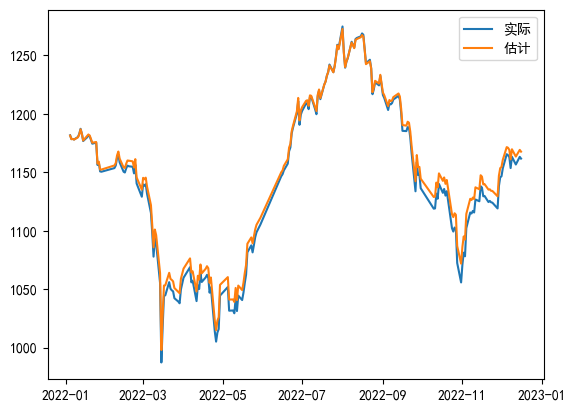

In [30]:
plt.plot(pd.to_datetime(df_test['日期']), test_y, label = '实际')
plt.plot(pd.to_datetime(df_test['日期']), predict_y, label = '估计')
plt.legend()
plt.show()

可见通过2012-2021这十年间的历史数据，对样本股和深证b股指数的线性回归，实现了2022年对该指数的精确估计。